In [4]:
#%% Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
from os.path import join as pjoin

pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib as mpl
from spks.event_aligned import population_peth
from spks.utils import alpha_function
from ephys.utils_analysis import (calculate_stim_offsets, 
                                  find_unique_cross_trial_offset_pairs, 
                                  compute_stim_response_for_trial_subset)
from ephys.viz import plot_scatter_panel

plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

%config InlineBackend.figure_format = 'svg'

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
#%% Load data
animal = 'GRB006'  # example animal
session = '20240723_142451'  # example session

data_dir = '/Users/gabriel/data'
trial_ts = pd.read_pickle(pjoin(data_dir, animal, session, "pre_processed", "trial_ts.pkl"))
spike_times_per_unit = np.load(pjoin(data_dir, animal, session, "pre_processed", "spike_times_per_unit.npy"), allow_pickle=True)

<StemContainer object of 3 artists>

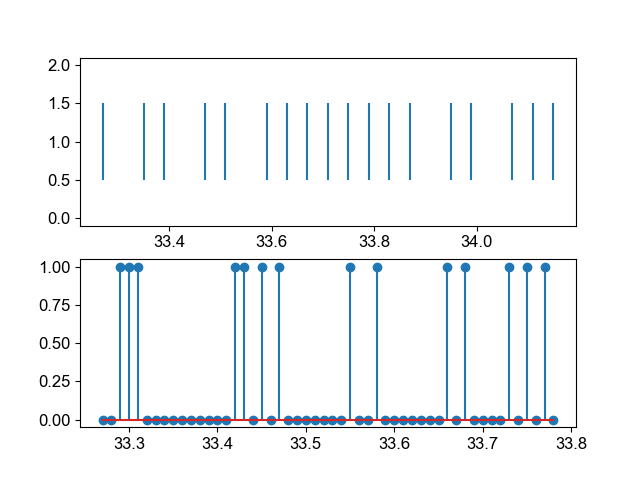

In [5]:
#%% Visualize binned spikes
all_stims = np.hstack(trial_ts.stim_ts)
spikes = spike_times_per_unit[0][np.logical_and(spike_times_per_unit[0] < all_stims[10], spike_times_per_unit[0] > all_stims[0])]
time = np.arange(all_stims[0], all_stims[10], 0.010)
spikes_binned, time_bins = np.histogram(spikes, time)
fig, (ax1, ax2) = plt.subplots(2)
ax1.eventplot(all_stims[:18])
ax2.stem(time_bins[:-1], spikes_binned)